# Manipulate strings

Throughout the following exercises, you will practice manipulating date strings in Python. Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics. 

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using pandas for operations, and matplotlib and seaborn for plotting.

## Objective

We will work with 2016–2018 lightning strike data from the National Oceanic and Atmospheric Association (NOAA) to calculate weekly sums of lightning strikes and plot them on a bar graph. 

Next, we will calculate quarterly lightning strike totals and plot them on bar graphs.

In [1]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read in the data
path = '/home/gato/Scripts/DS/DataIntoInsights/data/eda_manipulate_date_strings_with_python.csv'
df = pd.read_csv(path)
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


## Create new time columns

As with similar datasets we've worked with, the `date` column data type is a string object, which limits what we can do with the data in this column. Converting the column to datetime will enable us to work with this data much more easily.  

In [3]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

Next, we will create four new columns: `week`, `month`, `quarter`, and `year`. We can do this by using the `datetime.strftime()` method of our datetime object. `strftime` is short for "string format time." We'll use this method on the datetime data in the `week` column, and it will extract the information we specify, formatted as a string. 

To specify the information to extract, we use strftime format codes. You can find a full list of available codes to use in the [strftime format codes documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). In our case, we'll use `%Y` for year, `%V` for week number, `%q` for quarter.

**Note:** The following process might take a minute or two to complete.

In [4]:
# Create four new columns
df['week'] = df['date'].dt.strftime('%Y-W%V') # year follow by a dash w for week, % value 2016-w27
df['month'] = df['date'].dt.strftime('%Y-%m') # This will output the four digit year followed by a dash, then the two digit month

# The first Q is placed into the string to indicate we are talking 
# about quarters. The percent sign followed by the lower case q indicates 
# the Pandas that we want the date formatted into quarters
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
# This creates a column of data with it with only the year in it
df['year'] = df['date'].dt.strftime('%Y')

Use `head()` to check the columns were created as intended.

In [5]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


## Plot the number of weekly lightning strikes in 2018

Next we can plot the number of lightning strikes weekly. Start by filtering the original dataset to 2018. Use the `groupby()` and `sum()` functions to get number of strikes per week.

 let's just use the 2018 data and limit our chart to 52 weeks rather than 156 weeks. We can do this by creating a column that groups the data by year and then orders it by week. 

In [6]:
# Create new dataframe view of just 2018 data, summed by week
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum().reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


Now we have a nice little table of exactly what we need to plot the weekly lightning strike totals of 2018. We'll use the `plt.bar()` function to plot the bar graph. Within the argument field, input the x-axis, which is our `week` column, then the y-axis, or height, which we'll input as our `number_of_strikes` column. 

We'll use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to add appropriate text to the graph.

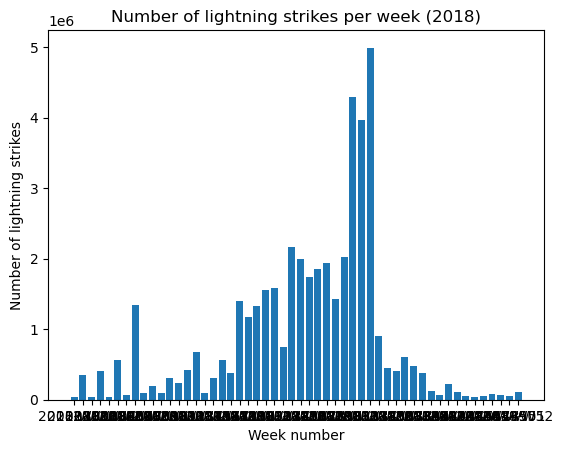

In [7]:
# Plot a bar graph of weekly strike totals in 2018
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

We have a graph, but we can't read the x-axis labels. To fix this problem, we'll first make it bigger using `plt.figure(figsize=(20, 5))`. This will change the size to 20 inches wide x 5 inches tall.

We can also use the `plt.xticks()` function to access the tick labels on our x-axis. Using the `rotation` and `fontsize` keyword arguments, we can rotate the labels and make the font smaller.

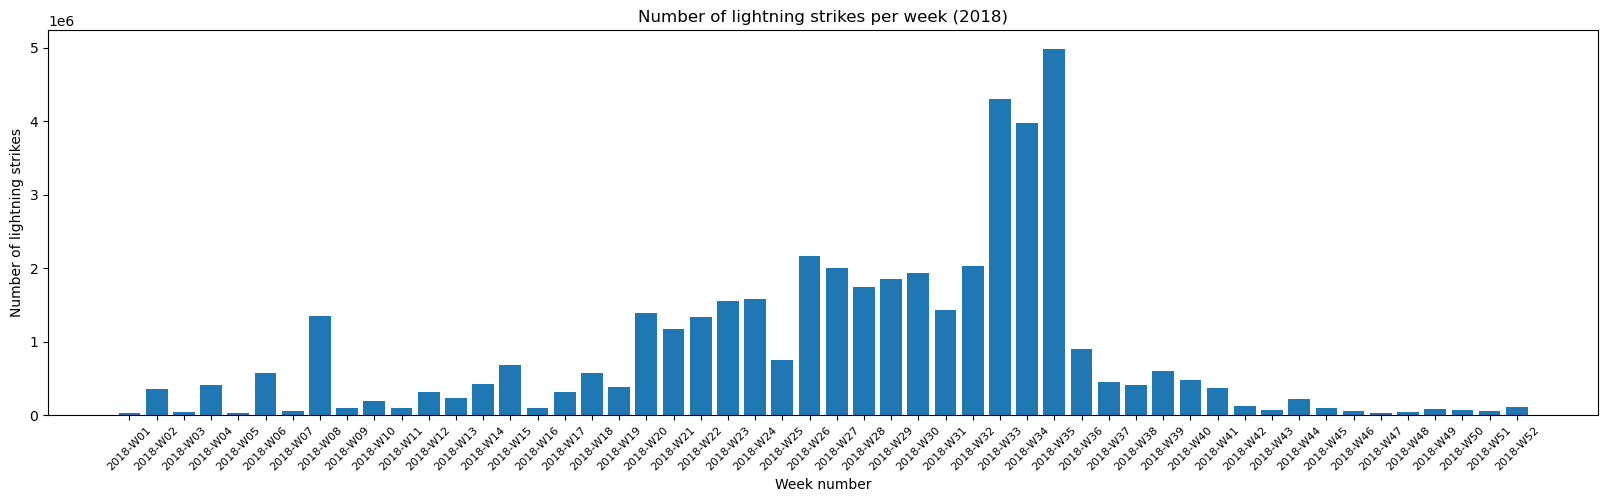

In [8]:
plt.figure(figsize = (20, 5)) # Increase output size
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size

plt.show()

## Plot the number of quarterly lightning strikes 2016–2018

Next, we'll plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be far easier to work with numbers in millions, such as 25.2 million, rather than 25,154,365, for example. As an example, the following code will divide the `number_of_strikes` column by one million.

In [9]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

This alone does not help much, because it just moved the decimal to the left. We'll need to format the numbers as well. We'll begin by grouping the data by quarter and summing.

Then, we'll create `number_of_strikes_formatted` column in the resulting dataframe by dividing by one million (like we did above), but also rounding to one digit after the decimal point, converting it to a string, and adding 'M' to the end, to represent millions.

In [10]:
# Group 2016-2018 data by quarter and sum
df_by_quarter = df.groupby(['quarter']).sum().reset_index()

# Format as text, in millions
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


Before we start plotting, we'll write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses `plt.text()`, which is a pyplot function whose positional arguments are `x`, `y`, and `s`. `x` represents the x axis coordinates, `y` represents the y axis coordinates, and `s` is for the text that you want to appear at these coordinates. For more information, refer to the [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

In [11]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

Now we'll plot the bar graph. 

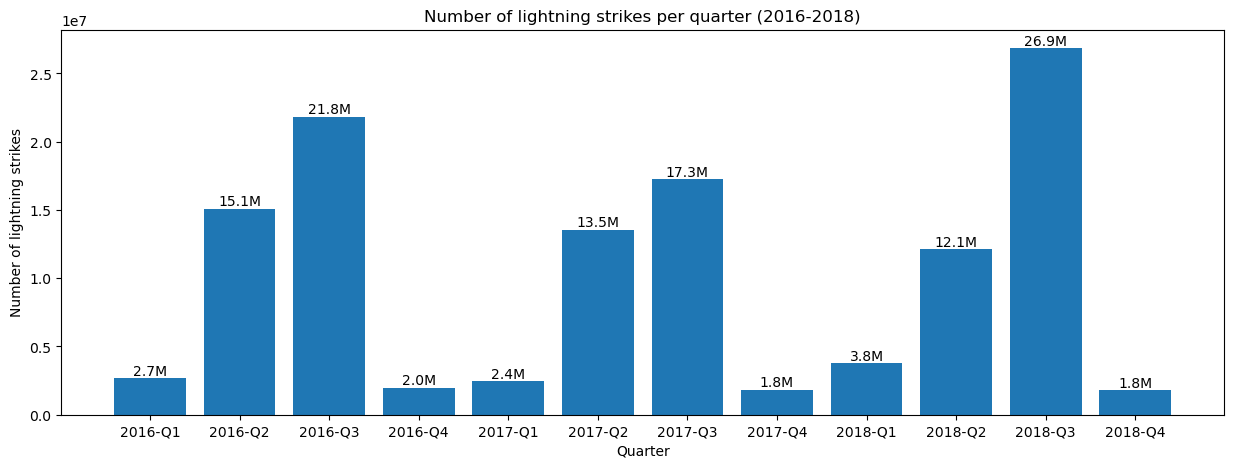

In [12]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

We can create a grouped bar chart to better compare year-over-year changes each quarter. We'll do this by creating two new columns that break out the quarter and year from the `quarter` column. To do this, we use the `quarter` column and take the last two characters to get `quarter_number`, and take the first four characters to get `year`.

In [13]:
# Create two new columns
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


Next, fill in the bar chart parameters. 

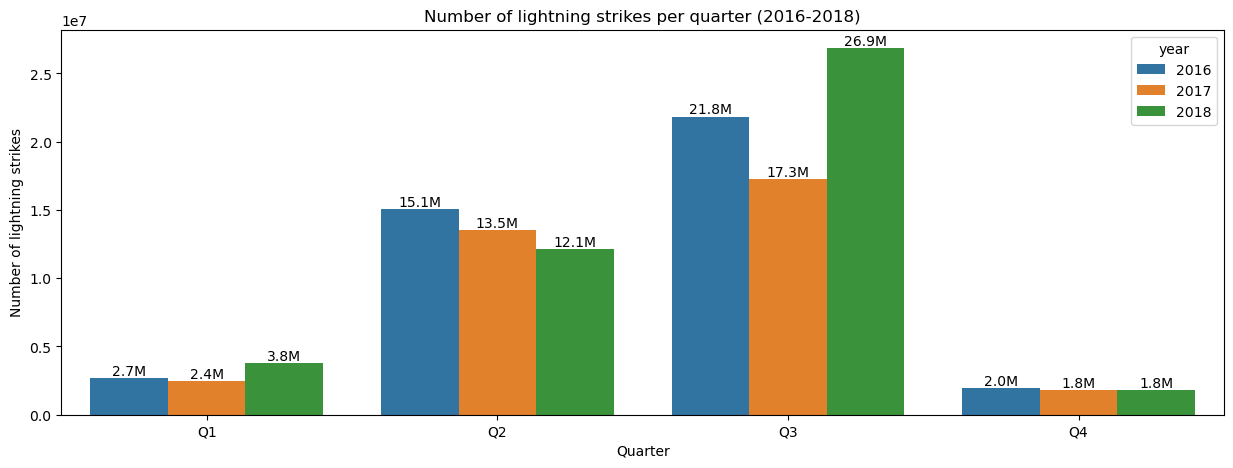

In [14]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

If you have successfully completed the material above, congratulations! You now understand how to manipulate date strings in Python and should be able to start doing it on your own datasets.